LOW-PASS 

Low-Pass Filter adalah Meneruskan frekuensi rendah dan menahan atau meredam frekuensi tinggi



In [23]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import IPython.display as ipd

In [6]:
# Membaca file audio
sample_rate, audio_data = wavfile.read('lowpass.wav')
print(f"Sample Rate: {sample_rate} Hz")
print(f"Data Shape: {audio_data.shape}")

Sample Rate: 48000 Hz
Data Shape: (514944, 2)


In [7]:
def low_pass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return lfilter(b, a, data)

In [8]:
cutoff_frequency = 4000  
filtered_audio = low_pass_filter(audio_data, cutoff_frequency, sample_rate)

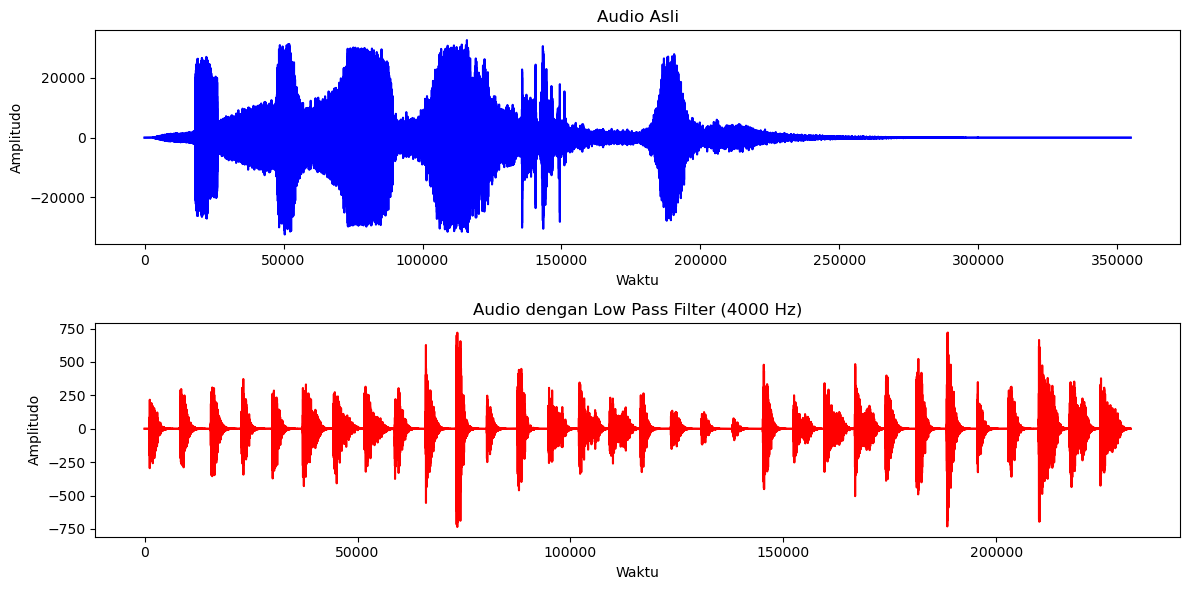

In [25]:
# Plot data audio asli dan yang sudah difilter
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_data, color='blue')
plt.title("Audio Asli")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")

plt.subplot(2, 1, 2)
plt.plot(filtered_audio, color='red')
plt.title("Audio dengan Low Pass Filter (4000 Hz)")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")

plt.tight_layout()
plt.show()

HIGH-PASS

High-Pass Filter adalah Meneruskan frekuensi tinggi dan meredam frekuensi rendah

In [24]:
# Membaca file audio
sample_rate, audio_data = wavfile.read('highpass.wav')
print(f"Sample Rate: {sample_rate} Hz")
print(f"Data Shape: {audio_data.shape}")

Sample Rate: 44100 Hz
Data Shape: (354816, 2)


In [11]:
def high_pass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = lfilter(b, a, data)
    return filtered_data

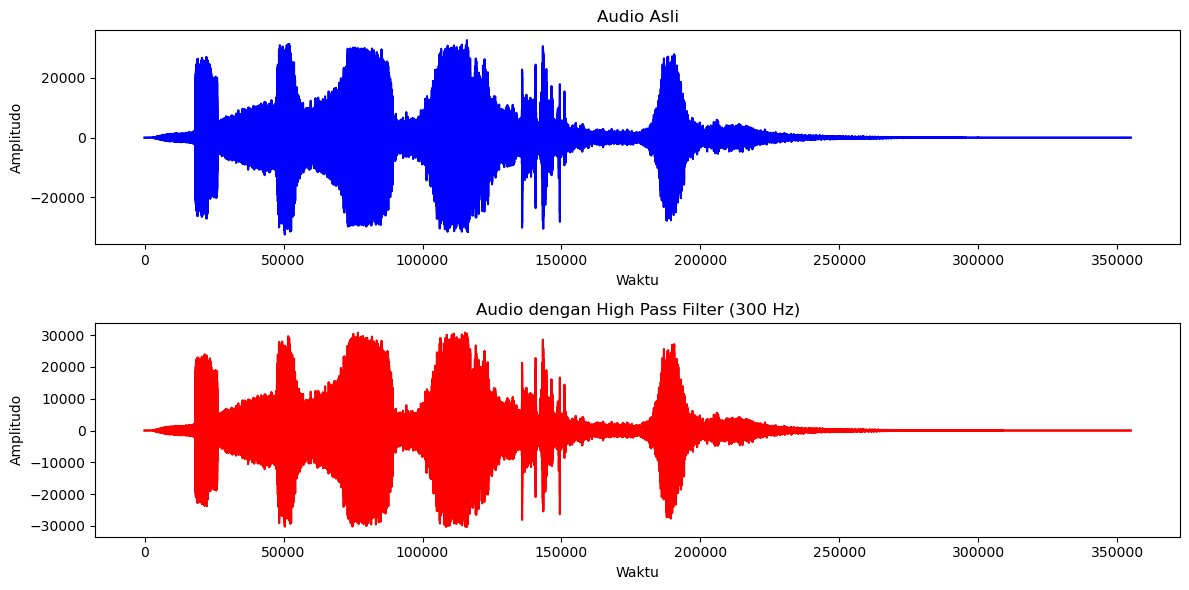

In [26]:
cutoff_frequency = 300  # Frekuensi batas 300 Hz
filtered_audio = high_pass_filter(audio_data, cutoff_frequency, sample_rate)

# Plot data audio asli dan yang sudah difilter
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_data, color='blue')
plt.title("Audio Asli")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")

plt.subplot(2, 1, 2)
plt.plot(filtered_audio, color='red')
plt.title("Audio dengan High Pass Filter (300 Hz)")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")

plt.tight_layout()
plt.show()

BAND-PASS

Band Pass Filter adalah Hanya meneruskan frekuensi dalam rentang tertentu, sementara frekuensi di luar rentang tersebut ditahan.

In [19]:
# Membaca file audio
sample_rate, audio_data = wavfile.read('bandpass.wav')
print(f"Sample Rate: {sample_rate} Hz")
print(f"Data Shape: {audio_data.shape}")

Sample Rate: 24000 Hz
Data Shape: (231552, 2)


In [17]:
# Fungsi Band Pass Filter
def band_pass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data)

In [20]:
# Parameter filter
lowcut = 1000   # Frekuensi batas bawah
highcut = 4000  # Frekuensi batas atas
filtered_audio = band_pass_filter(audio_data, lowcut, highcut, sample_rate)


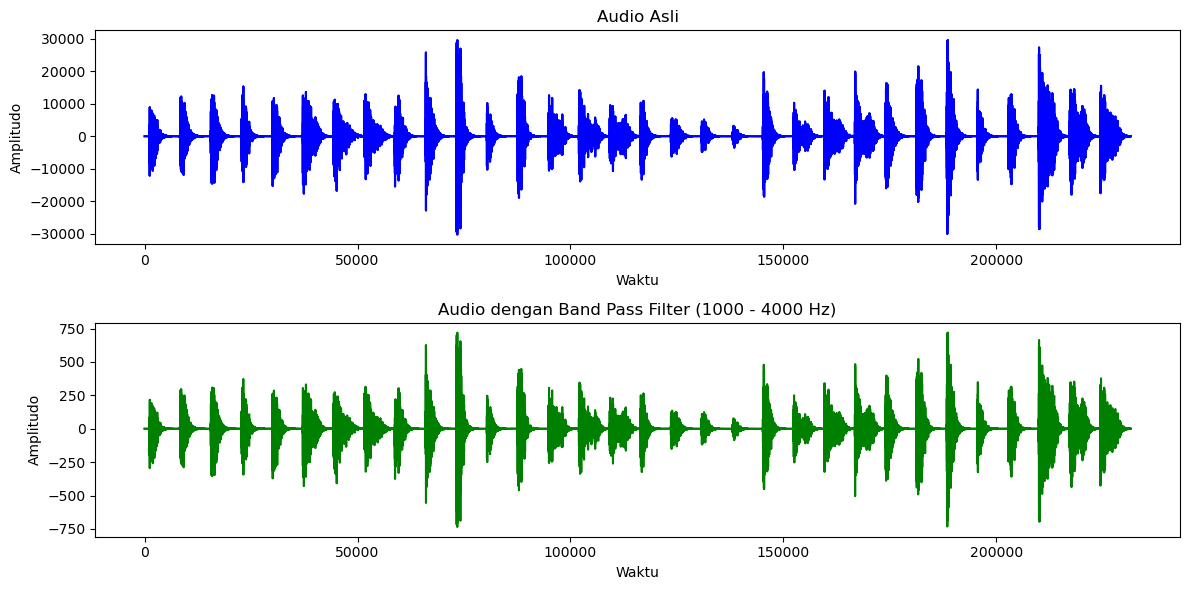

In [21]:
# Plot audio asli dan audio setelah difilter
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_data, color='blue')
plt.title("Audio Asli")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")

plt.subplot(2, 1, 2)
plt.plot(filtered_audio, color='green')
plt.title(f"Audio dengan Band Pass Filter ({lowcut} - {highcut} Hz)")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")

plt.tight_layout()
plt.show()